In [1]:
# Daniel Bandala @ apr 2022
import time
import numpy as np
import cv2
import datetime
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [3]:
folder = 'images'
image1=cv2.imread(f"{folder}/mri1.jpg")
image2=cv2.imread(f"{folder}/mri2.jpg")
image3=cv2.imread(f"{folder}/Berlin.jpg")
image=[image1,image2,image3]
reshaped=[0,0,0]
for i in range(0,3):
    reshaped[i] = image[i].reshape(image[i].shape[0] * image[i].shape[1], image[i].shape[2])

In [13]:
numClusters=list(map(int,input("Enter the number of culsters for image 1,2 and 3 respectively: ").split(" ")))

Enter the number of culsters for image 1,2 and 3 respectively:  3


In [14]:
clustering=[0,0,0]
for i in range(0,3):
    kmeans = KMeans(n_clusters=numClusters[0], n_init=40, max_iter=500).fit(reshaped[i])
    clustering[i] = np.reshape(np.array(kmeans.labels_, dtype=np.uint8),
    (image[i].shape[0], image[i].shape[1]))

In [16]:
sortedLabels=[[],[],[]]
for i in range(0,3):
    sortedLabels[i] = sorted([n for n in range(numClusters[0])],
        key=lambda x: -np.sum(clustering[i] == x))

In [18]:
kmeansImage=[0,0,0]
concatImage=[[],[],[]]
for j in range(0,3):
    kmeansImage[j] = np.zeros(image[j].shape[:2], dtype=np.uint8)
    for i, label in enumerate(sortedLabels[j]):
        kmeansImage[j][ clustering[j] == label ] = int((255) / (numClusters[0] - 1)) * i
    concatImage[j] = np.concatenate((image[j],193 * np.ones((image[j].shape[0], int(0.0625 * image[j].shape[1]), 3), dtype=np.uint8),cv2.cvtColor(kmeansImage[j], cv2.COLOR_GRAY2BGR)), axis=1)

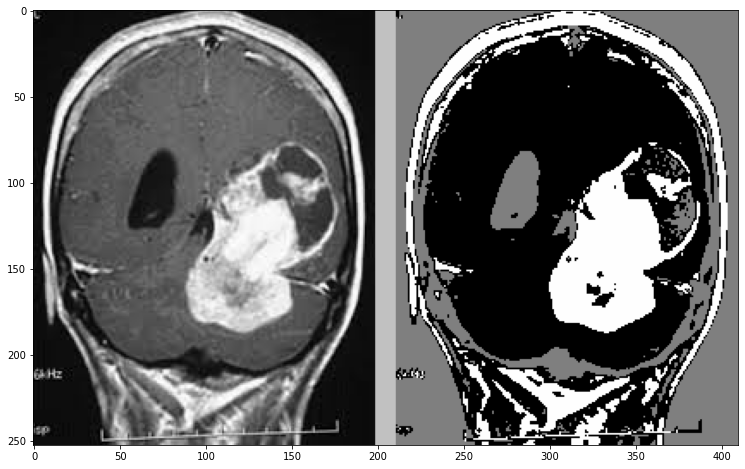

In [22]:
plt.figure(figsize=(16,8))
plt.imshow(concatImage[0])

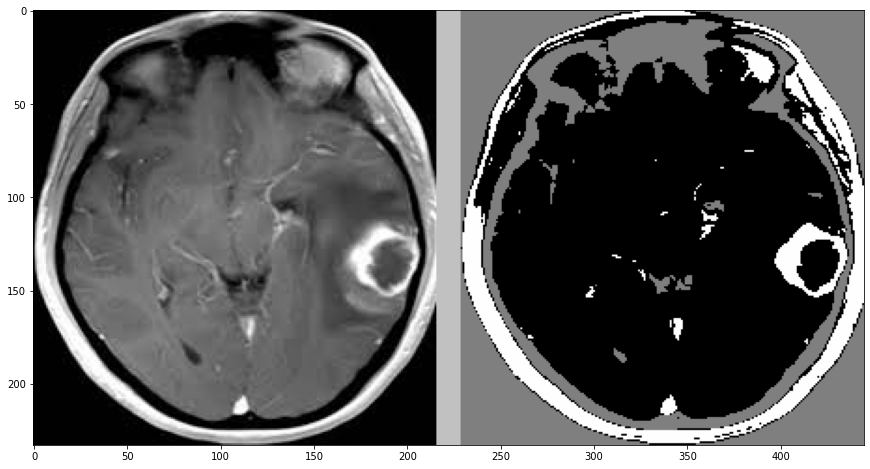

In [23]:
plt.figure(figsize=(16,8))
plt.imshow(concatImage[1])

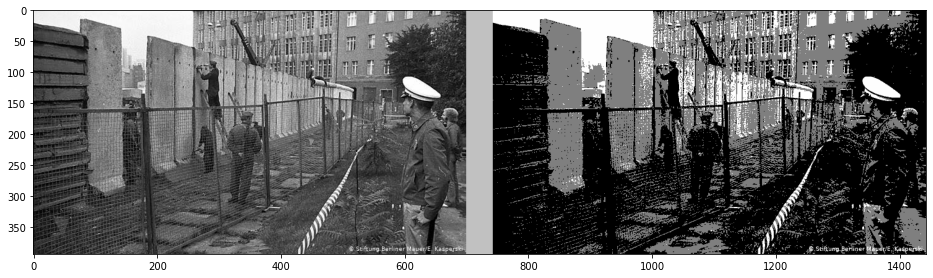

In [24]:
plt.figure(figsize=(16,8))
plt.imshow(concatImage[2])